Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')


load Dataset

In [2]:
df = pd.read_csv('/content/customer_churn_dataset-training-master.csv', on_bad_lines='skip')

df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
df.shape


(440833, 12)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [5]:
df.describe()


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


Data Cleaning(Check Missing Value)

In [6]:
df.isnull().sum()


,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


Handle Missing (NULL) Values

In [7]:
df.dtypes


,0
CustomerID,float64
Age,float64
Gender,object
Tenure,float64
Usage Frequency,float64
Support Calls,float64
Payment Delay,float64
Subscription Type,object
Contract Length,object
Total Spend,float64


Clean Columns ONE BY ONE

1️⃣ CustomerID (only identifier)

In [8]:
df = df.dropna(subset=['CustomerID'])


2️⃣ Numeric Columns

In [9]:
num_cols = [
    'Age', 'Tenure', 'Usage Frequency',
    'Support Calls', 'Payment Delay', 'Total Spend'
]

# Convert 'Support Calls' to numeric, coercing errors
df['Support Calls'] = pd.to_numeric(df['Support Calls'], errors='coerce')

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

3️⃣ Categorical Columns

In [10]:
cat_cols = ['Gender', 'Subscription Type', 'Contract Length']

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-922151183.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


5️⃣ Target Column: Churn

In [11]:
df = df.dropna(subset=['Churn'])


4️⃣ Last Interaction (Date / Days)

In [12]:
df['Last Interaction'].fillna(df['Last Interaction'].median(), inplace=True)


/tmp/ipython-input-1481450131.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Last Interaction'].fillna(df['Last Interaction'].median(), inplace=True)


VERIFY Cleaning

In [13]:
df.isnull().sum()


,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


Now start EDA process    📊 STEP 1: Understand Target Variable (Churn)

🔹 Check distribution

In [14]:
df['Churn'].value_counts()


,count
Churn,
1.0,249999
0.0,190833


🔹 Percentage

In [15]:
df['Churn'].value_counts(normalize=True) * 100


,proportion
Churn,
1.0,56.71072
0.0,43.28928


🔹 Visualization

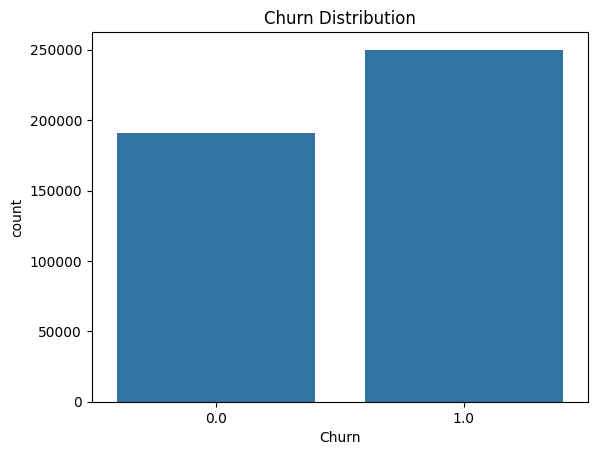

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


📊 STEP 2: Churn vs Gender

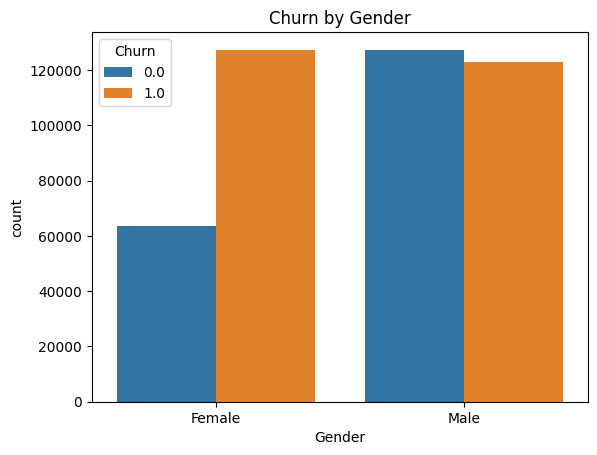

In [17]:
sns.countplot(x='Gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()


📊 STEP 3: Churn vs Age

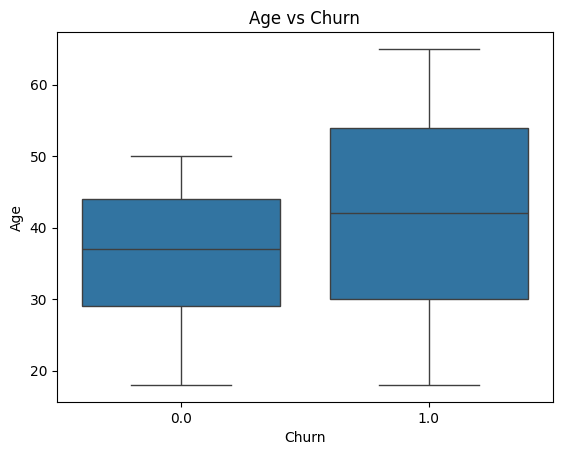

In [18]:
sns.boxplot(x='Churn', y='Age', data=df)
plt.title('Age vs Churn')
plt.show()


📊 STEP 4: Churn vs Tenure

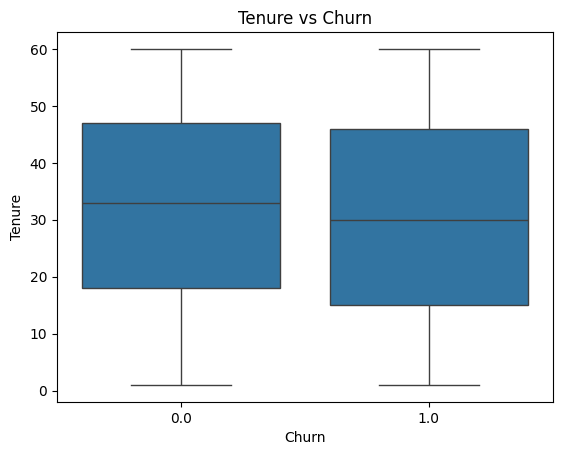

In [19]:
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()


📊 STEP 5: Usage Frequency Impact

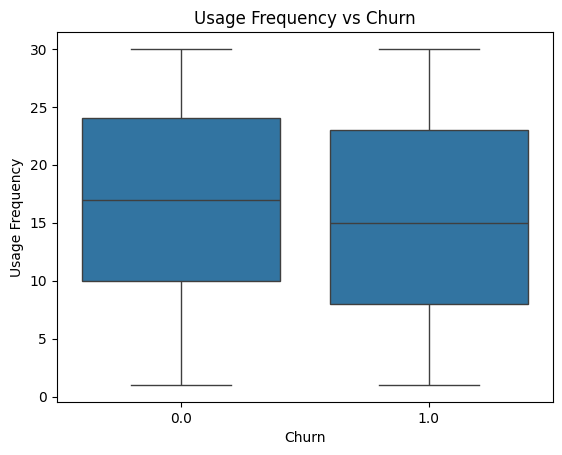

In [20]:
sns.boxplot(x='Churn', y='Usage Frequency', data=df)
plt.title('Usage Frequency vs Churn')
plt.show()


📊 STEP 6: Support Calls vs Churn

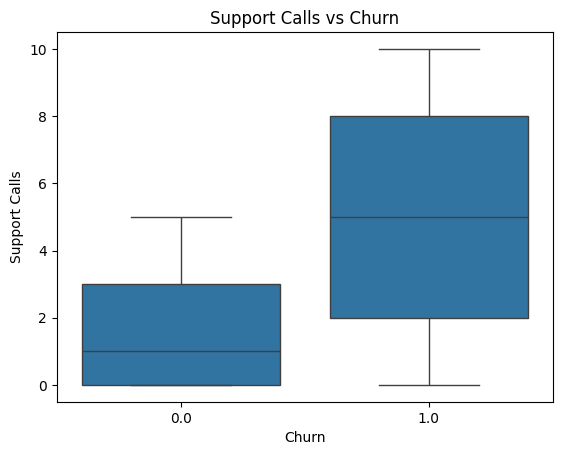

In [21]:
sns.boxplot(x='Churn', y='Support Calls', data=df)
plt.title('Support Calls vs Churn')
plt.show()


📊 STEP 7: Payment Delay vs Churn

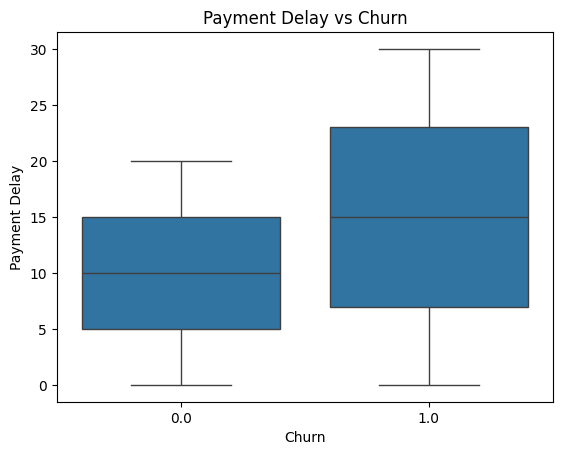

In [22]:
sns.boxplot(x='Churn', y='Payment Delay', data=df)
plt.title('Payment Delay vs Churn')
plt.show()



📊 STEP 8: Subscription Type vs Churn



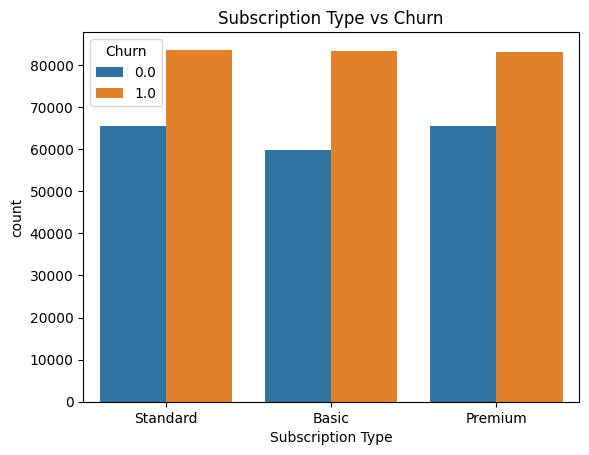

In [23]:
sns.countplot(x='Subscription Type', hue='Churn', data=df)
plt.title('Subscription Type vs Churn')
plt.show()


📊 STEP 9: Contract Length vs Churn

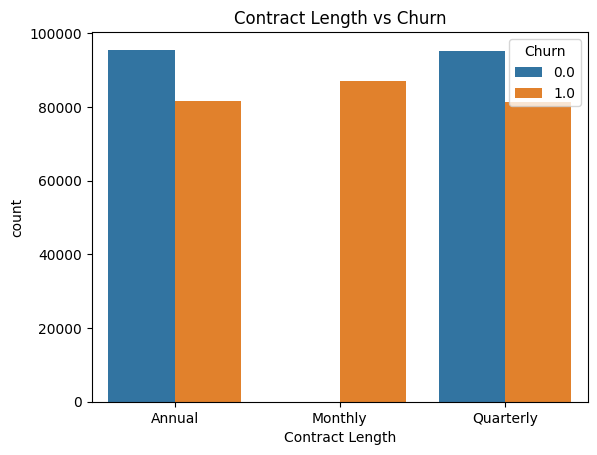

In [24]:
sns.countplot(x='Contract Length', hue='Churn', data=df)
plt.title('Contract Length vs Churn')
plt.show()


SQL PROCESS

import all libraries

In [25]:
import pandas as pd
import sqlite3


STEP 2: Confirm DataFrame Exists

In [26]:
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


STEP 3: Create SQLite Database

In [27]:
conn = sqlite3.connect('customer_churn.db')


🟢 STEP 4: Load DataFrame into SQL Table

In [28]:
df.to_sql(
    name='customer_churn',
    con=conn,
    if_exists='replace',
    index=False
)


440832

STEP 5: Verify SQL Table

In [29]:
pd.read_sql("SELECT * FROM customer_churn LIMIT 5", conn)


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


STEP 6: Total Customers

In [30]:
pd.read_sql(
    "SELECT COUNT(*) AS total_customers FROM customer_churn",
    conn
)


,total_customers
0,440832


STEP 7: Churn Count

In [31]:
pd.read_sql(
    "SELECT Churn, COUNT(*) AS total FROM customer_churn GROUP BY Churn",
    conn
)


,Churn,total
0,0.0,190833
1,1.0,249999


STEP 8: Churn Rate ⭐

In [32]:
pd.read_sql(
    """
    SELECT
    ROUND(
        SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) * 100.0 / COUNT(*),
        2
    ) AS churn_rate
    FROM customer_churn
    """,
    conn
)


,churn_rate
0,0.0


🟢 STEP 9: Churn by Gender

In [33]:
pd.read_sql(
    """
    SELECT Gender, Churn, COUNT(*) AS total
    FROM customer_churn
    GROUP BY Gender, Churn
    """,
    conn
)


,Gender,Churn,total
0,Female,0.0,63522
1,Female,1.0,127058
2,Male,0.0,127311
3,Male,1.0,122941


STEP 10: Churn by Contract Length

In [35]:
pd.read_sql(
    """
    SELECT "Contract Length", Churn, COUNT(*) AS total
    FROM customer_churn
    GROUP BY "Contract Length", Churn
    """,
    conn
)

,Contract Length,Churn,total
0,Annual,0.0,95552
1,Annual,1.0,81646
2,Monthly,1.0,87104
3,Quarterly,0.0,95281
4,Quarterly,1.0,81249


STEP 11: Avg Tenure (Churn vs Non-Churn)

In [36]:
pd.read_sql(
    """
    SELECT Churn, ROUND(AVG(Tenure), 2) AS avg_tenure
    FROM customer_churn
    GROUP BY Churn
    """,
    conn
)


,Churn,avg_tenure
0,0.0,32.28
1,1.0,30.47


STEP 12: High-Risk Customers (Business Query)

In [39]:
pd.read_sql(
    """
    SELECT CustomerID, Age, Tenure, "Support Calls", "Payment Delay"
    FROM customer_churn
    WHERE Churn = 'Yes'
    AND Tenure < 12
    AND "Support Calls" > 3
    """,
    conn
)

,CustomerID,Age,Tenure,Support Calls,Payment Delay


STEP 13: Write SQL Insights (MANDATORY)• SQL analysis shows customers with low tenure churn more
• High support calls indicate dissatisfaction
• Short contract customers are high risk
• Payment delay has strong churn impact


Machine learning(logistic regression)

STEP 1: Import Required Libraries

In [40]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


STEP 2: Confirm Dataset

In [41]:
df.head()
df.shape


(440832, 12)

STEP 3: Encode Target Variable (Churn)

In [49]:
# Ensure no NaNs remain in 'Churn' before converting to int
df.dropna(subset=['Churn'], inplace=True)
df['Churn'] = df['Churn'].astype(int)

STEP 4: Separate Features & Target

In [43]:
X = df.drop(['Churn', 'CustomerID'], axis=1)
y = df['Churn']


STEP 5: Encode Categorical Columns

In [44]:
le = LabelEncoder()

for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])


STEP 6: Train–Test Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


STEP 7: Feature Scaling (IMPORTANT)

In [46]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


STEP 8: Train Logistic Regression Model

In [50]:
df['Churn'].isnull().sum()


np.int64(0)

In [51]:
df['Churn'].value_counts(dropna=False)


,count
Churn,


In [58]:
# This step incorrectly converted the numeric 'Churn' to string, leading to NaNs later.
# It is not needed as 'Churn' is already numeric (0.0/1.0).
# It has been removed.

In [59]:
# This step incorrectly attempted to map 'Yes'/'No' after 'Churn' was converted to strings like '0.0'/'1.0'.
# This resulted in all 'Churn' values becoming NaN. It is not needed.
# It has been removed.

In [60]:
# This step was redundant as NaNs in 'Churn' were handled earlier in cell 'RWDDstE4YrMv'.
# After the previous incorrect steps, this line caused the entire DataFrame to become empty.
# It has been removed.

In [55]:
df['Churn'].isnull().sum()


np.int64(0)

In [56]:
X = df.drop(['Churn', 'CustomerID'], axis=1)
y = df['Churn']


In [61]:
df.shape


(0, 12)

In [62]:
df['Churn'].value_counts(dropna=False)


,count
Churn,


In [65]:
df = pd.read_csv('/content/customer_churn_dataset-training-master.csv')

In [66]:
df['Churn'] = df['Churn'].astype(str).str.strip()


In [67]:
df.shape


(440833, 12)

In [68]:
df['Churn'].value_counts(dropna=False)


,count
Churn,
1.0,249999
0.0,190833
nan,1


In [69]:
df = df.dropna(subset=['Churn'])


In [70]:
df['Churn'].value_counts(dropna=False)


,count
Churn,
1.0,249999
0.0,190833
nan,1


In [71]:
df = df.dropna(subset=['Churn'])



In [72]:
df['Churn'].value_counts(dropna=False)


,count
Churn,
1.0,249999
0.0,190833
nan,1


In [73]:
import numpy as np

df['Churn'] = df['Churn'].replace('nan', np.nan)


In [74]:
df = df.dropna(subset=['Churn'])


In [75]:
df['Churn'].value_counts(dropna=False)


,count
Churn,
1.0,249999
0.0,190833


STEP 1: Create X and y

In [76]:
X = df.drop(['Churn', 'CustomerID'], axis=1)
y = df['Churn']


STEP 2: Encode Categorical Columns

In [77]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])


STEP 3: Train-Test Split

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


STEP 4: Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


STEP 5: Train Logistic Regression Model ⭐

In [80]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

STEP 6: Evaluate Model
Accuracy

In [81]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict(X_test))


0.850431567366475

Classification Report

In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83     38063
         1.0       0.88      0.85      0.87     50104

    accuracy                           0.85     88167
   macro avg       0.85      0.85      0.85     88167
weighted avg       0.85      0.85      0.85     88167

